# Wine dataset analysis
**Author:** [Eanna Forde]

This notebook explores the wine dataset from 'sklearn.datasets'.

I will:
1. Load and explore the dataset
2. Compute summary statistics
3. Visualize distributions of selected features

In [1]:
import pandas as pd

## Problem 1: Load and explore the wine dataset
Load the dataset and explore the shape, first and last three rows, feature shape and their meaning and the target class labels

In [2]:
#import the wine dataset using sklearn.datasets.load_wine()
from sklearn.datasets import load_wine
#Load the wine dataset using sklearn
data = load_wine()
#Create a pandas dataframe using the data and feature names
df = pd.DataFrame(data.data, columns=data.feature_names) 
#Add the target (wine type) to the dataframe
df['target'] = data.target
#Check the number of rows and columns
df.shape #(178, 14) means 178 samples and 14 features including target

(178, 14)

In [3]:
#display the first three rows of the dataset
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [4]:
#display the last three rows of the dataset
df.tail(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [5]:
#view the feature names (columns)
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
#view the target class labels (wine types)
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## Task 2: Summary statistics
Calculate the following for each feature:
1. Mean
2. Range (max-min)
3. Standard deviation
4. Median
5. Interquartile Range (IQR)

This will help to understand the distributions and variability of the dataset

In [7]:
#Calculate the mean of each feature (average value)
#This gives the average value of each feature
df.mean(numeric_only=True)

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
target                            0.938202
dtype: float64

In [8]:
#Calculate the range (maximum - minimum)
#Range shows how spread out the values are. For example "proline" has a very large range (1402)
#Which means values vary a lot
df.max(numeric_only=True) - df.min(numeric_only=True)

alcohol                            3.80
malic_acid                         5.06
ash                                1.87
alcalinity_of_ash                 19.40
magnesium                         92.00
total_phenols                      2.90
flavanoids                         4.74
nonflavanoid_phenols               0.53
proanthocyanins                    3.17
color_intensity                   11.72
hue                                1.23
od280/od315_of_diluted_wines       2.73
proline                         1402.00
target                             2.00
dtype: float64

In [9]:
#Calculate the standard deviation
#This confirms how spreaad out the values are
df.std(numeric_only=True)

alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensity                   2.318286
hue                               0.228572
od280/od315_of_diluted_wines      0.709990
proline                         314.907474
target                            0.775035
dtype: float64

In [10]:
#Calculate the median (middle value)
#This hives the middle value, which can vary if the data is skewed.
df.median(numeric_only=True)

alcohol                          13.050
malic_acid                        1.865
ash                               2.360
alcalinity_of_ash                19.500
magnesium                        98.000
total_phenols                     2.355
flavanoids                        2.135
nonflavanoid_phenols              0.340
proanthocyanins                   1.555
color_intensity                   4.690
hue                               0.965
od280/od315_of_diluted_wines      2.780
proline                         673.500
target                            1.000
dtype: float64

In [11]:
#Calculate the inter quartile range (Q3 - Q1)
#This shows how spread out the middle 50% of the data is.
#Features like "proline" and "Magnesium" have large IQRs meaning high variability
q1 = df.quantile(0.25, numeric_only=True)
q3 = df.quantile(0.75, numeric_only=True)
iqr = q3 - q1 
iqr

alcohol                           1.3150
malic_acid                        1.4800
ash                               0.3475
alcalinity_of_ash                 4.3000
magnesium                        19.0000
total_phenols                     1.0575
flavanoids                        1.6700
nonflavanoid_phenols              0.1675
proanthocyanins                   0.7000
color_intensity                   2.9800
hue                               0.3375
od280/od315_of_diluted_wines      1.2325
proline                         484.5000
target                            2.0000
dtype: float64

## Task 3: Visualising distributions
Select four features and create Histograms for each.
The four features I have selected are:
1. Alcohol
2. Malic acid
3. Intensity
4. Proline 

In [12]:
#import matplotlib for plotting graphs
import matplotlib.pyplot as plt

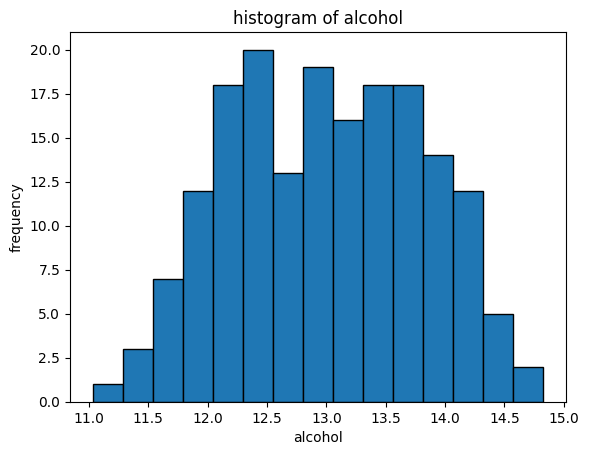

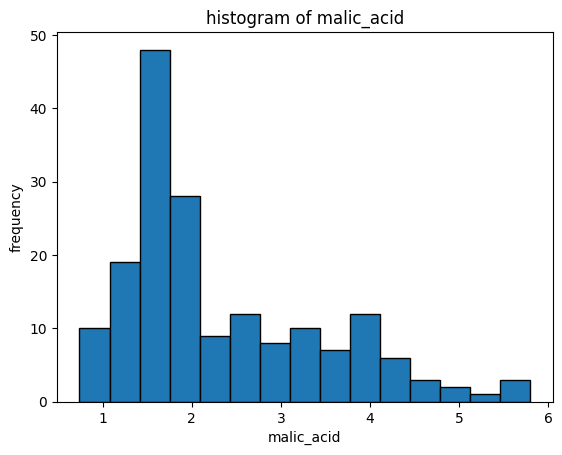

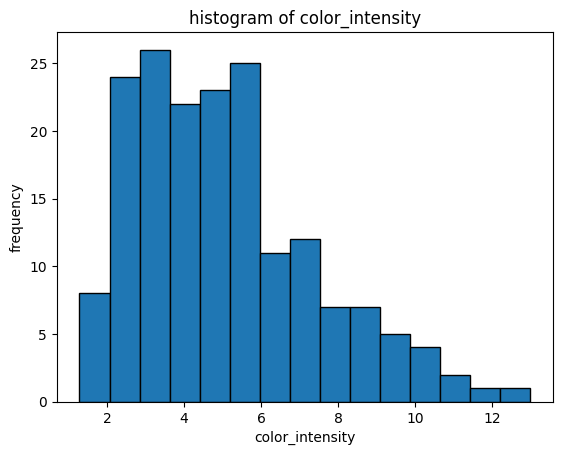

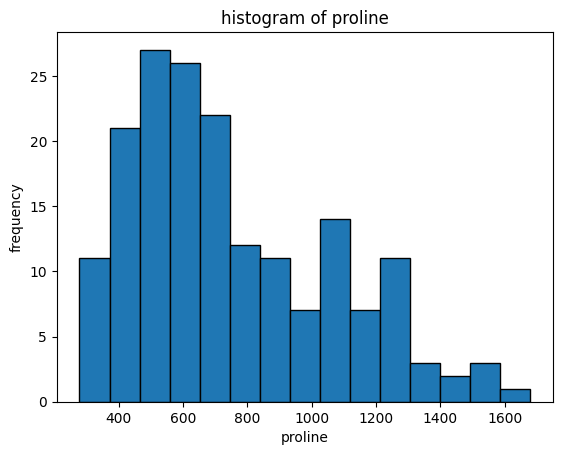

In [13]:
#Select four features to plotfrom the dataset that I want to visualize
#make sure to spell the feature names exactly as they appear in df.columns
features_to_plot = ['alcohol', 'malic_acid', 'color_intensity','proline']

#loop through each selected feature and plot a histogram
for feature in features_to_plot:
    #plot a histogram for the current feature
    plt.hist(df[feature], bins=15, edgecolor='black')  # bins=15 means divide data into 15 inervals
    plt.title(f"histogram of {feature}") # Add a title to explain what the plot shows
    plt.xlabel(feature) # label the x-axis with a feature name
    plt.ylabel("frequency") # label the y-axis label with "frequency" (how many times values occur in each)
    plt.show() #display the plot

## Task 4: Exploring relationships

In this task I want to explore the relationship between two features (columns) in the dataset

In [14]:
import matplotlib.pyplot as plt

#define a few pairs to try
pairs_to_test = [
    ("alcohol", "malic_acid"),
    ("color_intensity", "hue"),
    ("flavanoids", "total_phenols")
]

In [15]:
class_labels =  {0: "class 0", 1: "class 1", 2: "class 2"}

<function matplotlib.pyplot.show(close=None, block=None)>

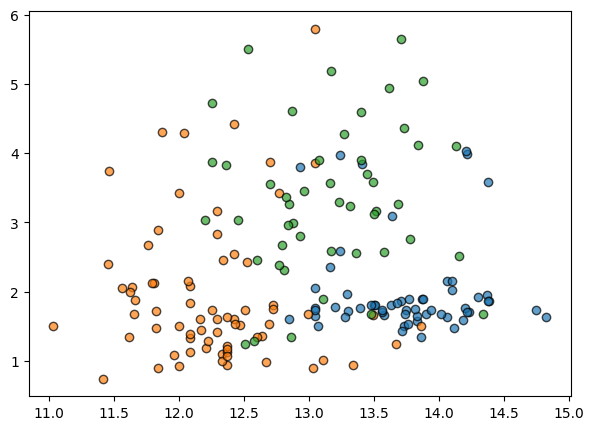

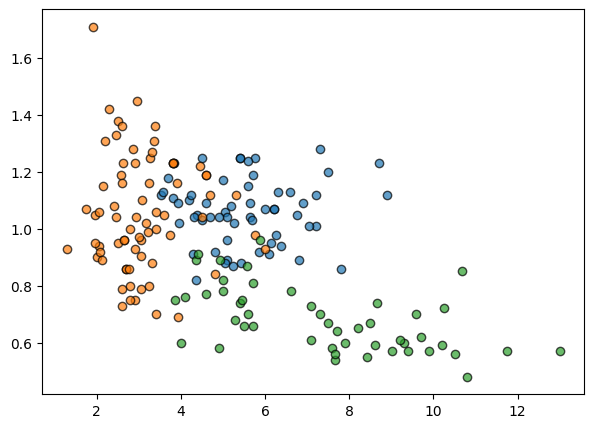

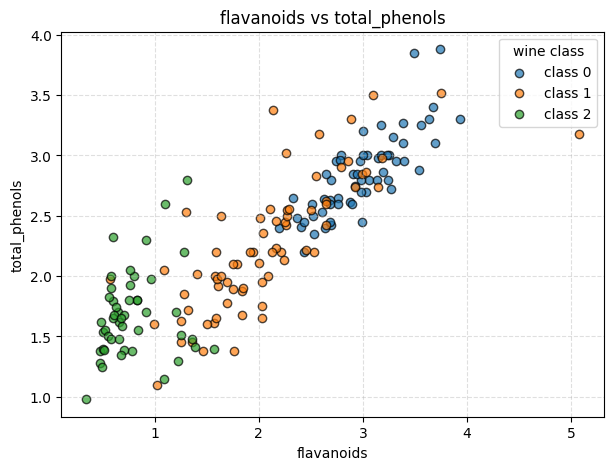

In [16]:
#plot scatter plots for each pair
for x_feature, y_feature in pairs_to_test:
    plt.figure(figsize=(7,5))
    for cls in sorted(df['target'].unique()):
        subset = df[df['target'] == cls]
        plt.scatter(
            subset[x_feature],
            subset[y_feature],
            alpha=0.7,
            label=class_labels[cls],
            edgecolor='k'

        )
            
plt.title(f"{x_feature} vs {y_feature}")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title="wine class")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show

### Scatter plot one: Alcohol vs Malic acid
Looking at the scatter plot of alcohol vs malic_acid, the points overlap quite a lot.  
There isn’t a very clear separation between the wine classes. This makes it less useful for distinguishing between wines for the purpose of looking at correlations.

### Scatter plot two: Color Intensity vs Hue
This plot shows a little bit more separation between the classes.  
For example, some wine classes are grouped more closely.  
However, there is still a lot of overlap, so it’s not the clearest choice.

### Scatter plot three: Flavanoids vs Total Phenols
This scatter plot shows a clear upward trend: as flavanoids increase, total phenols also increase. More importantly, the wine classes are separated more clearly compared to the other pairs.  
This makes it the most interesting relationship so far.

### Task 5: Correlation and Regression Line

In this problem, I will look at how strongly two features are related by fitting a straight line 
(linear regression) to the scatterplot made earlier in Task 4.  

I will:
1. Use the same two features from Task 4 (alcohol and color_intensity).
2. Fit a regression line using sklearn.linear_model.LinearRegression.
3. Plot both the scatter points and the fitted line.
4. Show the R² value (a number between 0 and 1 that tells us how well the line fits the data).
   - An R² close to 1 means a strong relationship.
   - An R² close to 0 means a weak relationship.


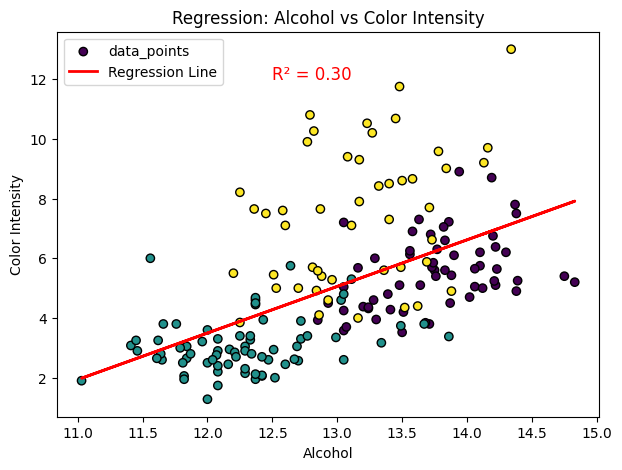

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression

# select the features
x = df[['alcohol']]
y = df['color_intensity']

# Fit regression model
model = LinearRegression()
model.fit(x,y)

# Predict values for regression line
y_pred = model.predict(x)

# Get the R2 value
r2 = model.score(x,y)

# Plot scatter
plt.figure(figsize=(7,5))
plt.scatter(df['alcohol'], df['color_intensity'], c=df['target'], cmap='viridis', edgecolor='k', label="data_points")

# Plot regression line
plt.plot(df['alcohol'], y_pred, color='red', linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.title("Regression: Alcohol vs Color Intensity")
plt.legend()

# Display R2 in the plot
plt.text(12.5, 12, f"R² = {r2:.2f}", fontsize=12, color="red")
plt.show()
